# Exploratory Data Analysis in Action - EDA: Renewable Energies

Reneweable Energies questions:
- Q1: How many powerplants are present worldwide that utilize Renewable Energies and how many that do not?
- Q2: How much energy is produced in a green way opposed to fossil and nuclear energy?
- Q3: Which European countries have the highest share of energy production from renewable sources? And which ones the lowest?
- Q4: Inspect a country of your choice. How much of energy is gained from individual fuel types? Is the result trustworthy?
- Q5: Which types of renewable energies produce the most energy in total? Is there a difference between continents?
- Q6:  _Come up with your own question_

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns  
import sys
sys.path.append("../src/")

from helper import cuteplot
from helper import minmax_scaler
plt.rcParams["figure.figsize"] = [22,10]

In [13]:
import pickle
gdf_world = pickle.load(open( "../data/gdf_world.p", "rb" ))
gdf_europe = pickle.load(open( "../data/gdf_europe.p", "rb" ))
gdf_germany = pickle.load(open( "../data/gdf_germany.p", "rb" ))

> **Q1: How many powerplants are present worldwide that utilize Renewable Energies and how many that do not?**

Columns in gdf_world: Index(['country code', 'country', 'name of powerplant', 'capacity in MW',
       'latitude', 'longitude', 'primary_fuel', 'start date', 'owner of plant',
       'geolocation_source', 'estimated_generation_gwh_2020', 'green',
       'continent', 'geometry'],
      dtype='object')
Worldwide, there are 24089 power plants utilizing renewable energy and 9570 utilizing non-renewable energy.


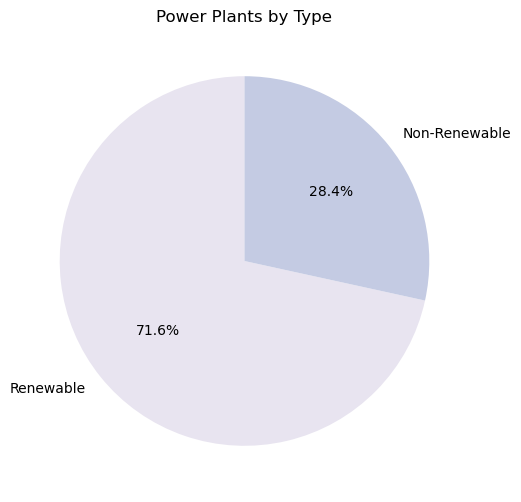

In [14]:
# Inspect columns to identify the correct column name
print("Columns in gdf_world:", gdf_world.columns)

# Define renewable energy sources
renewable_sources = ["Solar", "Wind", "Hydro", "Geothermal", "Biomass"]

# Q1: Count power plants based on renewable and non-renewable sources
if 'primary_fuel' in gdf_world.columns:
    renewable_plants = gdf_world[gdf_world['primary_fuel'].isin(renewable_sources)].shape[0]
    non_renewable_plants = gdf_world[~gdf_world['primary_fuel'].isin(renewable_sources)].shape[0]
    print(f"Worldwide, there are {renewable_plants} power plants utilizing renewable energy and {non_renewable_plants} utilizing non-renewable energy.")
       # Plotting
    labels = ['Renewable', 'Non-Renewable']
    sizes = [renewable_plants, non_renewable_plants]
    colors = sns.color_palette("PuBu")
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
    plt.title('Power Plants by Type')
    plt.show()
else:
    print("Column 'primary_fuel' not found in gdf_world. Please check the data.")


> **Q2: How much energy is produced in a green way opposed to fossil and nuclear energy?**

Total energy produced from renewable sources: 1519029.11974 MW.
Total energy produced from non-renewable sources: 3768310.466978 MW.


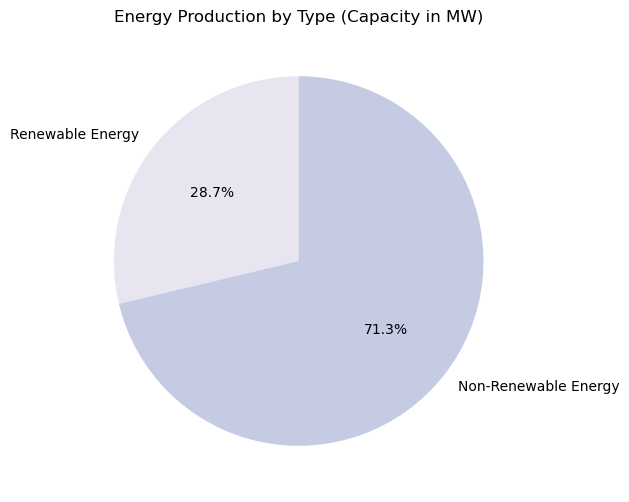

In [15]:
if 'primary_fuel' in gdf_world.columns and 'capacity in MW' in gdf_world.columns:
    renewable_energy = gdf_world[gdf_world['primary_fuel'].isin(renewable_sources)]['capacity in MW'].sum()
    non_renewable_energy = gdf_world[~gdf_world['primary_fuel'].isin(renewable_sources)]['capacity in MW'].sum()
    print(f"Total energy produced from renewable sources: {renewable_energy} MW.")
    print(f"Total energy produced from non-renewable sources: {non_renewable_energy} MW.")
        # Plotting
    labels = ['Renewable Energy', 'Non-Renewable Energy']
    sizes = [renewable_energy, non_renewable_energy]
    colors = sns.color_palette("PuBu")
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
    plt.title('Energy Production by Type (Capacity in MW)')
    plt.show()

else:
    print("Required columns 'primary_fuel' or 'capacity in MW' not found in gdf_world. Please check the data.")

> **Q3: Which European countries have the highest share of energy production from renewable sources? And which ones the lowest?**

> _Hint: consider using `df.groupby()` with a list of columns to group on. You can use `df.unstack()` afterwards to get rid of the multi-dimensional Index._

European countries with the highest share of renewable energy:
country
Albania     93.590582
Norway      97.378743
Iceland    100.000000
Name: capacity in MW, dtype: float64

European countries with the lowest share of renewable energy:
country
Kosovo     0.000000
Hungary    1.344842
Moldova    2.196294
Name: capacity in MW, dtype: float64


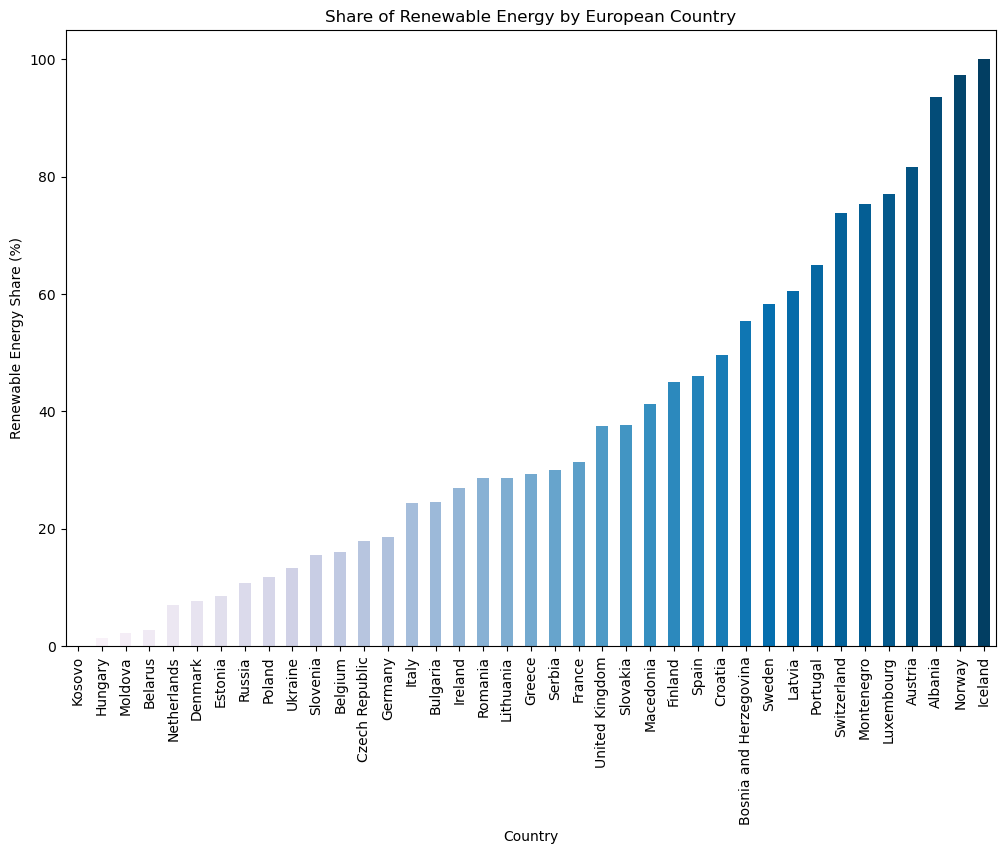

In [18]:
def calc_renewable_share(df):
    total_energy = df.groupby('country')['capacity in MW'].sum()
    renewable_energy = df[df['primary_fuel'].isin(renewable_sources)].groupby('country')['capacity in MW'].sum()
    share = (renewable_energy / total_energy * 100).fillna(0).sort_values()
    return share

if 'country' in gdf_europe.columns and 'capacity in MW' in gdf_europe.columns and 'primary_fuel' in gdf_europe.columns:
    renewable_share_europe = calc_renewable_share(gdf_europe)
    highest_renewable = renewable_share_europe.tail(3)
    lowest_renewable = renewable_share_europe.head(3)
    print("European countries with the highest share of renewable energy:")
    print(highest_renewable)
    print("\nEuropean countries with the lowest share of renewable energy:")
    print(lowest_renewable)
        # Plotting
    plt.figure(figsize=(12, 8))
    renewable_share_europe.plot(kind='bar', color=sns.color_palette("PuBu", len(renewable_share_europe)))
    plt.title('Share of Renewable Energy by European Country')
    plt.xlabel('Country')
    plt.ylabel('Renewable Energy Share (%)')
    plt.show()
else:
    print("Required columns not found in gdf_europe. Please check the data.")

> **Q4: Inspect a country of your choice. How much of energy is gained from individual fuel types? Is the result trustworthy?**

> _Hint: Double check your result with another source. Is the dataset trustworthy for your country?_

> _Note: Consider plotting plants on a map of the country. Consider using the `map_extent` argument in the `cuteplot()` function._

Energy production in Germany by fuel type:
primary_fuel
Biomass     1655.30000
Coal       47015.90000
Gas        24392.55000
Hydro       9984.10000
Nuclear    11171.00000
Oil         2795.20000
Other        756.90000
Solar       6767.76288
Waste       1588.80000
Wind        1482.94200
Name: capacity in MW, dtype: float64


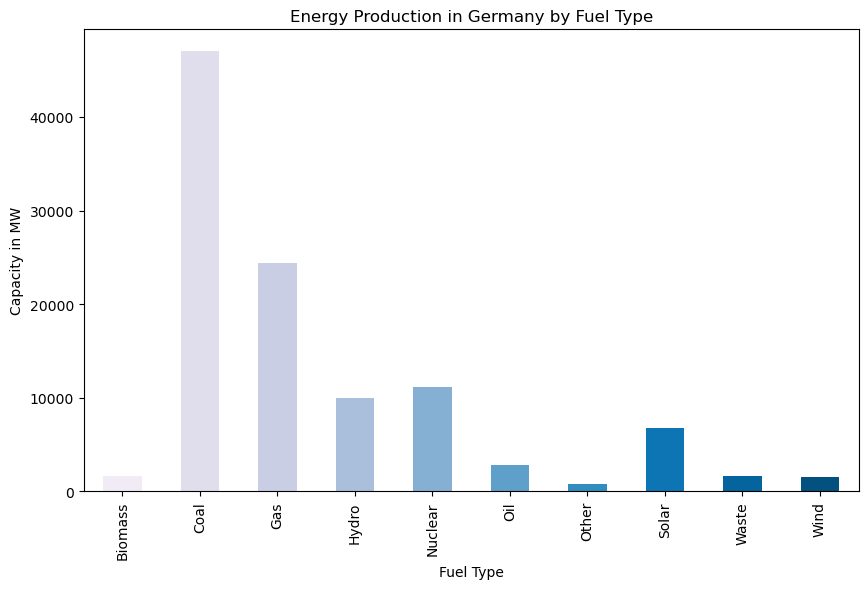

In [19]:
if 'primary_fuel' in gdf_germany.columns and 'capacity in MW' in gdf_germany.columns:
    fuel_type_distribution = gdf_germany.groupby('primary_fuel')['capacity in MW'].sum()
    print("Energy production in Germany by fuel type:")
    print(fuel_type_distribution)
    # Plotting
    plt.figure(figsize=(10, 6))
    fuel_type_distribution.plot(kind='bar', color=sns.color_palette("PuBu", len(fuel_type_distribution)))
    plt.title('Energy Production in Germany by Fuel Type')
    plt.xlabel('Fuel Type')
    plt.ylabel('Capacity in MW')
    plt.show()

else:
    print("Required columns 'primary_fuel' or 'capacity in MW' not found in gdf_germany. Please check the data.")


> **Q5: Which types of renewable energies produce the most energy in total? Is there a difference between continents?**

Most productive renewable energy sources globally:
primary_fuel
Hydro         1.050109e+06
Wind          2.371800e+05
Solar         1.859784e+05
Biomass       3.344945e+04
Geothermal    1.231215e+04
Name: capacity in MW, dtype: float64
Renewable energy production by type and continent:
primary_fuel      Biomass  Geothermal        Hydro        Solar         Wind
continent                                                                   
Africa           217.8370      761.30   30347.1200   4761.34000    3317.5100
Asia            1142.1600     4229.30  438944.7720  94799.22000   53329.8700
Europe          8645.0360     1208.00  213833.6809  31777.65321   46564.4595
North America   9189.4000     5447.55  198936.3600  43526.60000  117533.8000
Oceania          605.8000      666.00   13251.3000   4159.67000    5335.6300
South America  13649.2146        0.00  154795.9139   6953.92863   11098.6940


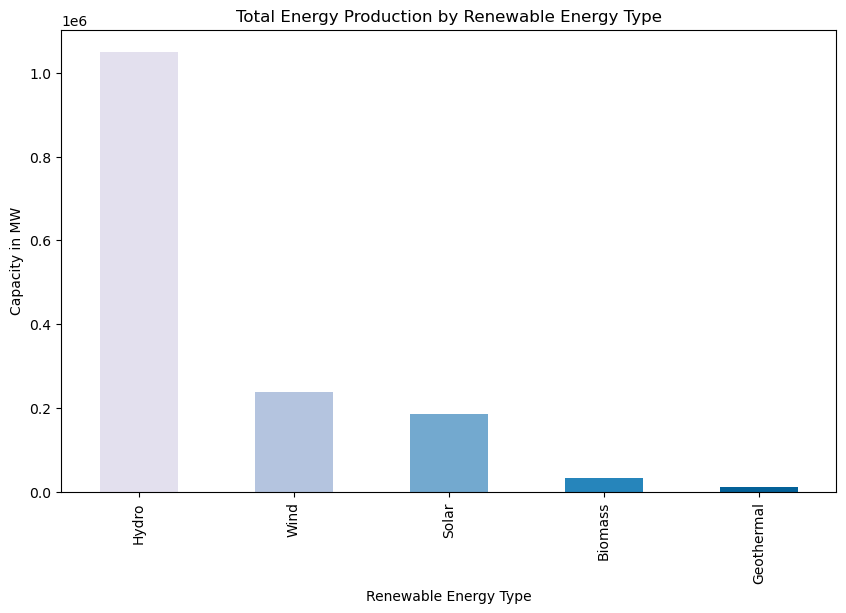

In [20]:
if 'primary_fuel' in gdf_world.columns and 'capacity in MW' in gdf_world.columns and 'continent' in gdf_world.columns:
    renewable_energy_types = gdf_world[gdf_world['primary_fuel'].isin(renewable_sources)]
    energy_by_type = renewable_energy_types.groupby('primary_fuel')['capacity in MW'].sum().sort_values(ascending=False)
    print("Most productive renewable energy sources globally:")
    print(energy_by_type)

    energy_by_continent = renewable_energy_types.groupby(['continent', 'primary_fuel'])['capacity in MW'].sum().unstack().fillna(0)
    print("Renewable energy production by type and continent:")
    print(energy_by_continent)
    plt.figure(figsize=(10, 6))
    energy_by_type.plot(kind='bar', color=sns.color_palette("PuBu", len(energy_by_type)))
    plt.title('Total Energy Production by Renewable Energy Type')
    plt.xlabel('Renewable Energy Type')
    plt.ylabel('Capacity in MW')
    plt.show()
else:
    print("Required columns 'primary_fuel', 'capacity in MW', or 'continent' not found in gdf_world. Please check the data.")

> **Q6: _Come up with your own question_**

Top 10 countries with the highest total energy production:
country
China                       1.330888e+06
United States of America    1.184078e+06
India                       3.001913e+05
Russia                      2.266748e+05
Japan                       1.794536e+05
Brazil                      1.453822e+05
Canada                      1.391387e+05
Germany                     1.076105e+05
France                      1.074660e+05
United Kingdom              7.997563e+04
Name: capacity in MW, dtype: float64


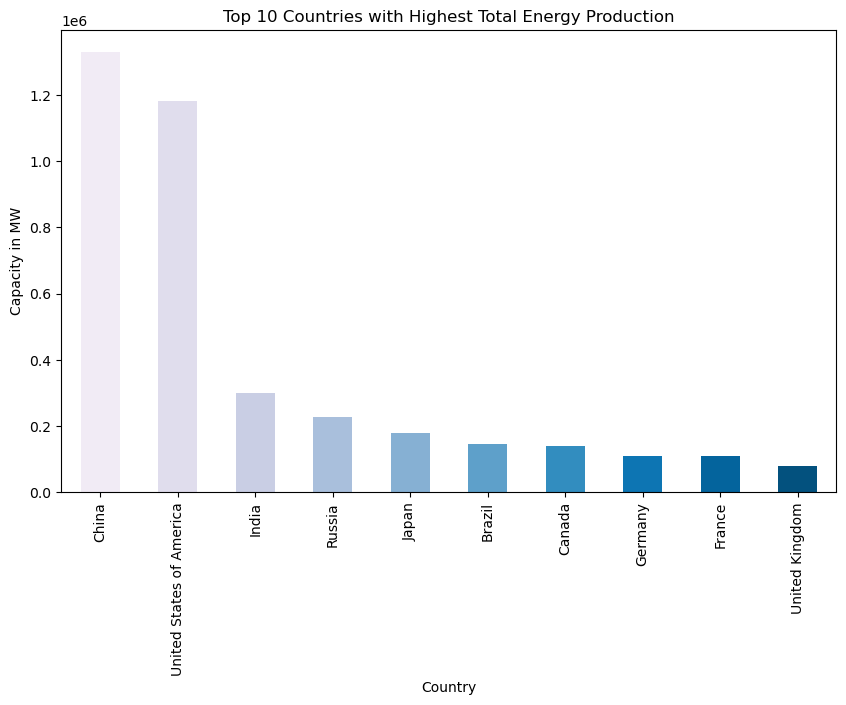

In [16]:
#Custom question: Top countries with the highest total energy production
if 'country' in gdf_world.columns and 'capacity in MW' in gdf_world.columns:
    total_energy_by_country = gdf_world.groupby('country')['capacity in MW'].sum().sort_values(ascending=False).head(10)
    print("Top 10 countries with the highest total energy production:")
    print(total_energy_by_country)
    plt.figure(figsize=(10, 6))
    total_energy_by_country.plot(kind='bar', color=sns.color_palette("PuBu", len(total_energy_by_country)))
    plt.title('Top 10 Countries with Highest Total Energy Production')
    plt.xlabel('Country')
    plt.ylabel('Capacity in MW')
    plt.show()
else:
    print("Required columns 'country' or 'capacity in MW' not found in gdf_world. Please check the data.")
